# Almog PIV project

Post analysis, see also the analysis*.ipynb

February 15
Run 2 


In [7]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

In [8]:
## Initialize data location

In [9]:
import pathlib
root_path = pathlib.Path('/media/user/ExtremePro/almog/feb15-')
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'


run_no = 3
first_file = 310
num_files = 100
d = 26 # mm 
U_theo = 0.020 # m/s


list_files = sorted(analysis_path.rglob('feb15-000*.vec'))
netcdf_file = f'../data/feb15_run{run_no}.nc'


## Figures

Almog prepared a document on overleaf about the PIV analysis. the link is here
https://www.overleaf.com/project/63f5eeb8f7fb1a583f248b22


1. we normalize everything to the cylinder_scale $d$ and $U_\infty$
2. We plot $V_x(y)$ to see that it is close to 1 and perpendicular to see that the flow is not affected by the walls



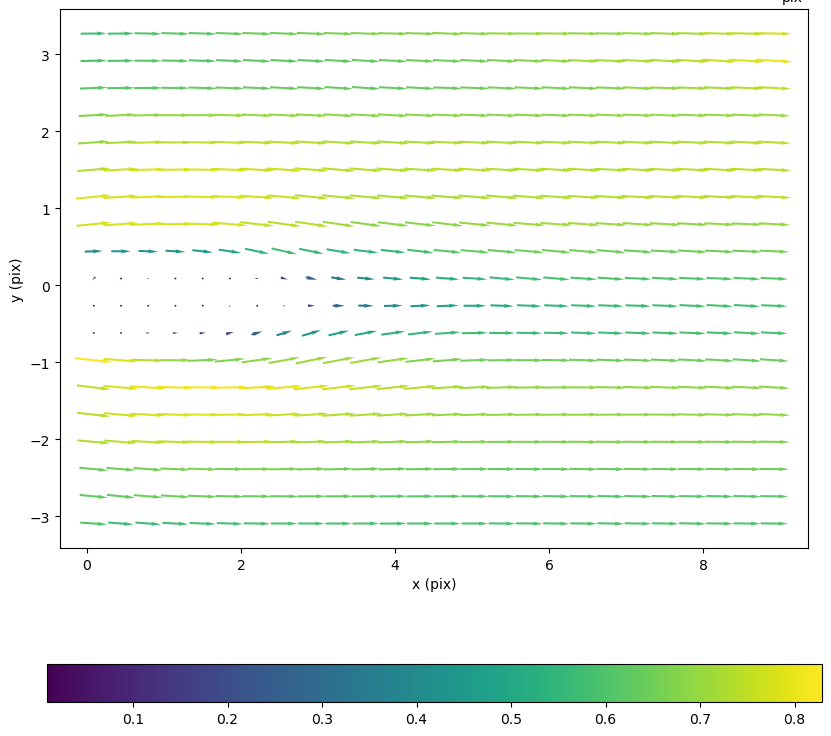

In [10]:
# non dimensionalization
# ds is scaled above, but not completely, to comply with images

ds = xr.load_dataset(netcdf_file)

# Run 2 is scaled already by Insight. Careful !!!!

# we measured 
# mm_scale = 3204 # mm
# pix_scale = 3204 # pix, see above
# dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec


# ds = ds.piv.set_scale(mm_scale/pix_scale)
# ds = ds.piv.set_delta_t(dt)
# ds['u'] = ds['u']*mm_scale/pix_scale
# ds['v'] = ds['v']*mm_scale/pix_scale
# ds['u'] = ds.u / dt
# ds['v'] = ds.v / dt

# # now size is in mm and velocity in m/s

ave = ds.piv.average


# ave['x'] = ave['x']*mm_scale/pix_scale / d # in mm, so it's now dimensionless
# ave['y'] = ave['y']*mm_scale/pix_scale / d 

ave['x'] = ave['x'] / d # in mm, so it's now dimensionless
ave['y'] = ave['y'] / d 


ave['x'] = ave['x'].max() - ave['x']

middle = ave['y'].min() / 2

ave['y'] = ave['y'] - middle

ave['u'] = -1*ave['u']


ave['u'] = ave['u'] / U_theo
ave['v'] = ave['v'] / U_theo


fig = plt.figure()
ave.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4, cmap='viridis')
fig.savefig(f'../results/feb15-run{run_no}_piv_map.png')

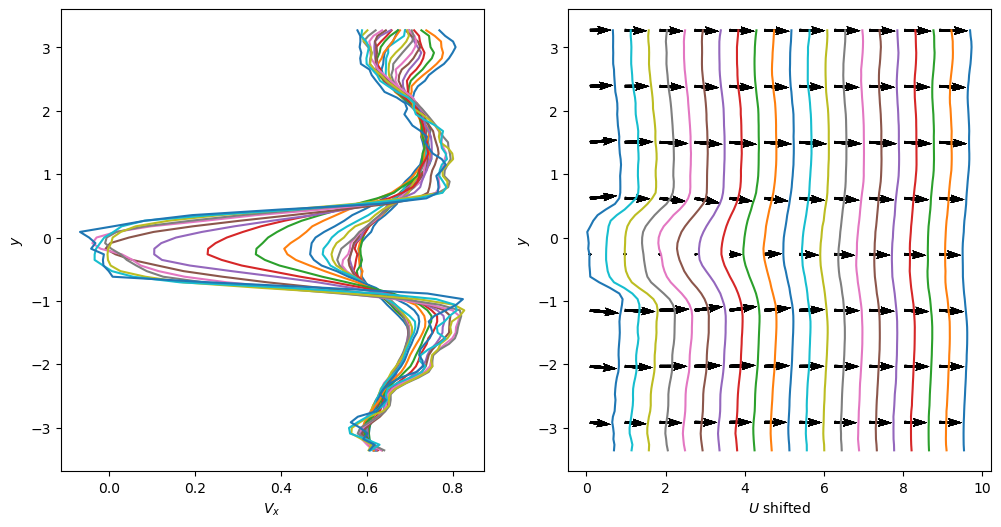

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

for x in ave.x[::5]:
    tmp = ave.sel(x=x, method='nearest')
    ax[0].plot(tmp.u, tmp.y)
    ax[0].set_xlabel('$V_x$')
    ax[0].set_ylabel('$y$')
    
    ax[1].quiver(ave['x'][::10],ave['y'][::10],ave['u'][::10,::10].T,ave['v'][::10,::10].T)
    ax[1].plot(tmp.u + x, tmp.y)
    ax[1].set_xlabel('$U$ shifted')
    ax[1].set_ylabel('$y$')


fig.savefig(f'../results/feb15-run{run_no}_profiles_Utheo.png')

In [12]:
output_file = f'../data/feb15_run{run_no}_ave.nc'
ave.to_netcdf(output_file)